In [1]:
!pip install glob2
!pip install pydicom

  Created wheel for glob2: filename=glob2-0.7-py2.py3-none-any.whl size=9308 sha256=c6071bd84204c5317111e15834e33b6a9e1b2ea695bb04714ac04e97b31e7507
  Stored in directory: /root/.cache/pip/wheels/95/59/ed/52469ecfae47a78c25f11bcb49db42ff84629df01861876883
Successfully built glob2
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 1.9 MB 2.3 MB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


## Import libraries and set parameters

In [76]:
import os
import glob2
import pydicom
import cv2
import matplotlib.pyplot as plt

from struct import unpack
# from pydicom import dcmread
# from pydicom.data import get_testdata_file
# from pydicom.waveforms import generate_multiplex

In [41]:
dcm_file = '../data/20210120/0747 basal hypo/0747[0].dcm'
image_folder = '../data/20210120/0747 basal hypo/0747[0]_frames/'
if not os.path.exists(image_folder):
    os.mkdir(image_folder)
# we expect all images to be 512 * 512
target_height = 512
target_width =512

## Extract images from dcm

In [42]:
ds = pydicom.read_file(dcm_file)
imgs = ds.pixel_array
for i,j in enumerate(imgs):
    image_fn = '%.5d.jpg' % i
    image_path = os.path.join(image_folder, image_fn)
    cv2.imwrite(image_path, j)
print("total images:", len(imgs))

total images: 173


In [73]:
# print(ds[0x0008, 0x0005].value)
print(ds)

ISO_IR 100
Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 176
(0002, 0002) Media Storage SOP Class UID         UI: X-Ray Angiographic Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.46.670589.28.681722603995231.201702070739522637842211511
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.410.200010.99.3.5
(0002, 0013) Implementation Version Name         SH: 'INF_3.8'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'SINGLE PLANE', 'SINGLE A']
(0008, 0012) Instance Creation Date              DA: '20210115'
(0008, 0013) Instance Creation Time              TM: '095220.000133'
(0008, 0016) SOP Class UID                       UI: X-Ray Angiographic Image Storage
(0008, 0018) SOP Instance

https://www.rapidtables.com/convert/number/hex-to-decimal.html

4146


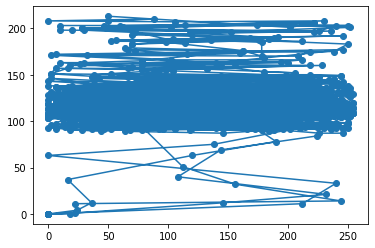

In [105]:
print(len(ds[0x5000, 0x3000].value))
x_points = []
y_points = []
for i in range(len(ds[0x5000, 0x3000].value)):
    if i % 2 == 0:
        x_points.append(ds[0x5000, 0x3000].value[i])
        y_points.append(ds[0x5000, 0x3000].value[i+1])
        

plt.scatter(x_points[:], y_points[:])
plt.plot(x_points[:], y_points[:])

## Check the size of converted image

00120.jpg
image size: (512, 512, 3)


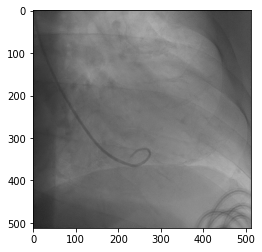

In [4]:
img_list = os.listdir(image_folder)
print(img_list[0])
image = cv2.imread(os.path.join(image_folder, img_list[0]))
print("image size:", image.shape)
plt.imshow(image)